# Описание

## Цель

Изучить метод k-ближайших соседей и метод линейной регрессии.

## Задачи

1. Вариация гиперпараметра k в методе ближайших соседей.
2. Построении решающей поверхности для kNN.
3. Написание kNN своими руками.
4. Написание линейной регрессии своими руками.
5. Применение регуляризаций в линейной регрессии.

## Входные данные

1. kNN: датасет `wine` из библиотеки sklearn. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).
2. LinearRegression: датасет, содержащий информацию о бриллиантах. Описание набора можно найти [здесь](https://www.kaggle.com/shivam2503/diamonds).

### Вариация гиперпараметра k в методе ближайших соседей

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


Проверим, есть ли пропущенные значения. Если да, то удалим их.  
Закодируем категориальные признаки

In [ ]:
count_na = X.isna().sum()
count_na == 0

alcohol                         True
malic_acid                      True
ash                             True
alcalinity_of_ash               True
magnesium                       True
total_phenols                   True
flavanoids                      True
nonflavanoid_phenols            True
proanthocyanins                 True
color_intensity                 True
hue                             True
od280/od315_of_diluted_wines    True
proline                         True
dtype: bool

Пропущенных значений нет

In [ ]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

Категориальных признаков нет

Разделим выборку на тренировочну и тестовую, задав размер тестовой выборки 0.3

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Разбиваем выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
145,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0


Масштабируем признаки.  
Посмотрим, что будет с классификатором kNN, если варьировать число соседей.

Как итог, выведем долю правильных ответов на тренировочной и тестовой выборках

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# Создаем массив для KNN и объект StandardScaler
knn = [0]*6
scaler = StandardScaler()

# Создаем 6 различных KNN
knn[0] = KNeighborsClassifier(n_neighbors = 1, p = 1)
knn[1] = KNeighborsClassifier(n_neighbors = 3, p = 1)
knn[2] = KNeighborsClassifier(n_neighbors = 5, p = 1)
knn[3] = KNeighborsClassifier(n_neighbors = 10, p = 1)
knn[4] = KNeighborsClassifier(n_neighbors = 15, p = 1)
knn[5] = KNeighborsClassifier(n_neighbors = 25, p = 1)
knn[3].n_neighbors

10

In [ ]:
# Применяем scaler (предпочел оставить данные в виде numpy)
X_train_knn = scaler.fit_transform(X_train[['alcohol', 'magnesium']])
X_test_knn = scaler.transform(X_test[['alcohol', 'magnesium']])
#X_train_knn.head()

In [ ]:
print("NN\tTrain\tTest")
y_pred_train, y_pred_test = 0, 0

for i, NN in enumerate([1, 3, 5, 10, 15, 25]):

    # Обучение knn и предсказание
    knn[i].fit(X_train_knn, y_train)
    y_pred_train = knn[i].predict(X_train_knn)
    y_pred_test = knn[i].predict(X_test_knn)

    # Подсчет метрики качества
    acc_train = np.mean(y_pred_train == y_train)
    acc_test = np.mean(y_pred_test == y_test)
    print("{}\t{:.2f}\t{:.2f}".format(NN, acc_train, acc_test))

NN	Train	Test
1	1.00	0.65
3	0.81	0.80
5	0.76	0.72
10	0.77	0.74
15	0.70	0.76
25	0.69	0.81


### Построение решающей поверхности для kNN.

Изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов.

Воспользуемся библиотекой `mlxtend`, с помощью которой построим решающие поверхности обученных классификаторов

In [ ]:
#!pip install mlxtend

In [ ]:
import mlxtend

100%|██████████| 6/6 [17:53<00:00, 178.95s/it]


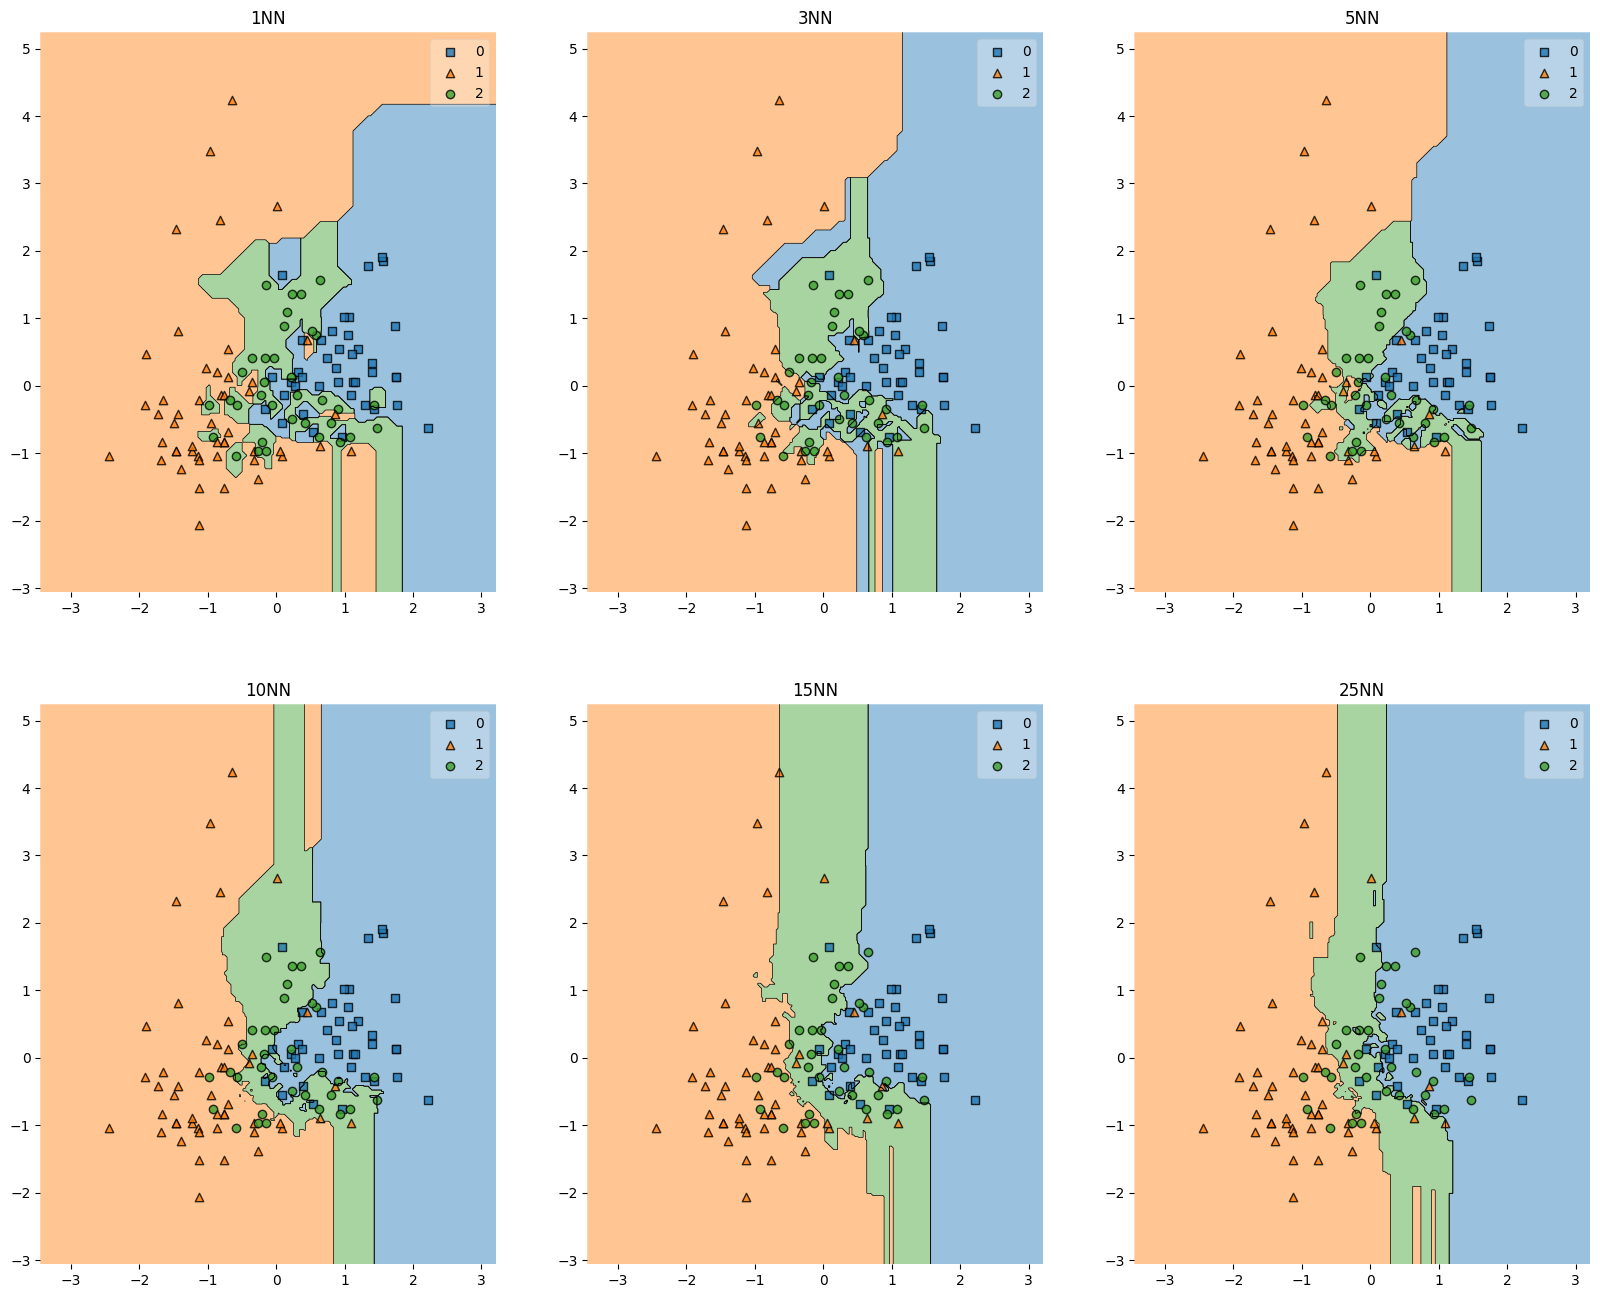

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from tqdm import tqdm

# Создание сетки, размера фигуры, лейблов
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize = (20, 16))
labels = ['1NN', '3NN', '5NN', '10NN', '15NN', '25NN']

# Создание графиков
for clf, label, grd in tqdm(zip(knn, labels, itertools.product([0, 1], [0, 1, 2])), total = len(labels)):
    clf.fit(X_train_knn, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_train_knn, y_train, clf = clf)
    plt.title(label)

# Вывод на экран
plt.show()

__Вывод__:  
Наиболее оптимальные - это 5NN и 10NN. 15NN и 20NN слишком рваные и переобученные, что видно из картинок. 1NN будет выдавать плохие результаты на тестовой выборке.

### Написание kNN своими руками.

Попробуем реализовать kNN для классификации вручную.

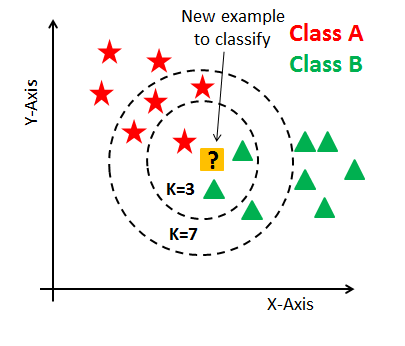

In [ ]:
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator

class KNN(BaseEstimator):
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      # Запоминаем датасет
      self.X = X
      self.y = y

    def predict(self, X):
      # Записываем в переменные количество признаков и число соседей
      feat_size = np.array(X).shape[1]
      k = self.k
      y = self.y
      sz = self.X.shape[0] # Количество соседей
      ans = []

      # Проходим по всем элементам X (это одномерные массивы) и инициализируем массив соседей и их минимальных расстояний
      for x_0 in X:
          dist = [(0, 0)]*sz # Сюда будем записывать расстояния до всех x

          # Находим ближайших соседей и записываем в массив расстояний
          for i, x in enumerate(self.X):
              dist[i] = (sum((x_0[i] - x[i])**2 for i in range(feat_size)) ** (1/2), y[i])

          dist.sort() # Сортируем, чтобы взять k минимальных
          classes = [dist[i][1] for i in range(k)] # Находим классы ближайших k объектов
          ans.append(Counter(classes).most_common()[0][0]) # Добавляем к ответу

      # Возвращаем ответ для всех элементов X
      return(ans)


Сделаем тестовый файл, с помощью которого сможем проверить, верно ли работает классификатор.  


In [ ]:
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1, 0]

In [ ]:
test_knn(KNN)

### Написание линейной регрессии своими руками.

В этом задании мы попробуем реализовать алгоритм линейной регрессии своими руками и рассмотрим различные аспекты построения линейной модели.

Вручную загружаю diamonds.csv

In [ ]:
data = pd.read_csv('/content/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.shape

(53940, 11)

Мы будем решать задачу на примере предсказания цены бриллианта `price` в зависимости от его характеристик.

Реализация базовой линейной регрессии

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator

class Linreg(BaseEstimator):

    def fit(self, X, y):
      # Добавим к X столбец из единиц (x_0)
      X, y = np.array(X), np.array(y)
      ones = np.ones(X.shape[0], dtype = int).reshape(X.shape[0], 1)
      X = np.concatenate((ones, X), axis = 1)

      # Инициализируем веса случайно
      n_objects, n_features = X.shape
      np.random.seed(42)
      self.w = np.random.uniform(-10, 10, (n_features))

      # Установим learning_rate и num_steps
      lr = 1e-2
      num_steps = 10**4
      for i in range(num_steps):
          grad = np.dot(X.T, np.dot(X, self.w) - y)
          self.w -= 2 * lr * grad / y.shape[0]

    def predict(self, X):
      X = np.array(X)
      ones = np.ones(X.shape[0], dtype = int).reshape(X.shape[0], 1)
      X = np.concatenate((ones, X), axis = 1)
      return np.dot(X, self.w)

Удалим пропущенные значения из набора, если такие имеются

In [ ]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Пропущенных значений нет

In [ ]:
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками.  
Выведем матрицу корреляций.

<ipython-input-19-a3675904423f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = heatmap(data.corr(), annot=True, cmap = 'coolwarm')


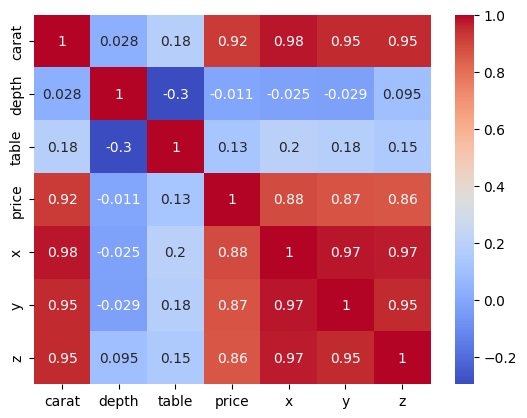

In [ ]:
from seaborn import heatmap
ax = heatmap(data.corr(), annot=True, cmap = 'coolwarm')

Таким образом, с переменной `price` коррелируют больше всего: `x`, `y`, `z`, `carat`

Закодируем категориальные признаки с помощью OneHot Encoding.

In [ ]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Будем кодировать `cut`, `color`, `clarity`



In [ ]:
data = pd.get_dummies(data, columns = ['cut', 'color', 'clarity'], drop_first = True)
data.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


Разделим выборку на тренировочную и тестовую, указав долю тестовой выборки: 0.3

In [ ]:
X = data.drop(['price'], axis = 1)
y = data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
16259,1.01,62.0,57.0,6.44,6.36,3.97,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
24005,1.54,62.6,56.0,7.42,7.35,4.62,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
12211,1.15,63.1,63.0,6.63,6.53,4.15,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
37918,0.41,60.6,57.0,4.79,4.84,2.92,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
181,0.54,61.5,57.0,5.24,5.26,3.23,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


Масштабируем вещественные признаки тренировочной и тестовой выборки с помощью модуля `StandardScaler`

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Оценим линейную регрессию.  
Выведем среднеквадратичную ошибку на тренировочной и тестовой выборке

In [ ]:
lr = Linreg()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
print(f'MSE on train is: {mse(y_train, y_pred_train)}\nMSE on test is: {mse(y_test, y_pred_test)}')

MSE on train is: 1285364.6653840668
MSE on test is: 1260949.7176725345


Для сравнения посмотрим результат линейной регрессии из sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
sklearn_lr = LinearRegression()
sklearn_lr.fit(X_train, y_train)
y_pred_train = sklearn_lr.predict(X_train)
y_pred_test = sklearn_lr.predict(X_test)
print(f'Sklearn MSE on train is: {mse(y_train, y_pred_train)}\nSklearn MSE on test is: {mse(y_test, y_pred_test)}')

Sklearn MSE on train is: 1284661.862119126
Sklearn MSE on test is: 1259159.1137946642


Результат откровенно плохой и на тренировочной выборке, и на тестовой, ошибка слишком большая.  
Результат sklearn.model_selection.LinearRegression практически такой же

Выведем полученные оценки коэффициентов.  

In [ ]:
sklearn_lr.coef_

array([ 5.27811998e+03, -9.42669361e+01, -6.56183723e+01, -1.05002476e+03,
       -2.64737971e+00, -4.05686230e+01,  1.55923708e+02,  3.89952109e+02,
        3.14449843e+02,  2.91047679e+02, -6.95800253e+01, -9.09479485e+01,
       -1.82693620e+02, -3.39522613e+02, -4.30763476e+02, -5.17728075e+02,
        9.57549314e+02,  1.57320442e+03,  1.01623724e+03,  1.64046365e+03,
        1.79084281e+03,  1.26334765e+03,  1.44548292e+03])

Отсюда видно, что самые большие по модулю веса:  
1. Свободный член *w_0*.
2. *w_3*, отвечающий за коэффициент перед `table`.
3. Последние 6 *w_i*, отвечающих за коэффициенты перед `clarity`.



### Применение регуляризаций в линейной модели

Из матрицы корреляций следует, что между некоторыми признаками есть сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Попробуем использовать регуляризацию, чтобы решить эту проблему.

Обучим Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Посмотрим, насколько изменятся веса.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

lasso = Lasso(alpha = 10, random_state = 0)
ridge = Ridge(alpha = 10, random_state = 0)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

lasso_weights = np.array([format(num, "e") for num in lasso.coef_])
ridge_weights = np.array([format(num, "e") for num in ridge.coef_])

print(f'Lasso MSE is: {mse(y_train, y_pred_train)}\nRidge MSE is: {mse(y_test, y_pred_test)}')
print(f"Lasso weights:\n {lasso_weights}")
print(f'Ridge weights:\n {ridge_weights}')

Lasso MSE is: 1284661.862119126
Ridge MSE is: 1259159.1137946642
Lasso weights:
 ['4.784582e+03' '-1.004642e+02' '-7.680709e+01' '-6.035249e+02'
 '-0.000000e+00' '-4.009154e+01' '3.215914e+01' '1.844359e+02'
 '1.283878e+02' '1.208132e+02' '-0.000000e+00' '-2.442703e+01'
 '-1.058244e+02' '-2.679196e+02' '-3.591966e+02' '-4.596047e+02'
 '6.553063e+02' '8.698178e+02' '4.065803e+02' '1.047000e+03'
 '1.103880e+03' '8.464660e+02' '9.630616e+02']
Ridge weights:
 ['5.240033e+03' '-9.246210e+01' '-6.579110e+01' '-1.008690e+03'
 '-4.490211e+00' '-4.405713e+01' '1.566593e+02' '3.913140e+02'
 '3.156414e+02' '2.925352e+02' '-6.917609e+01' '-9.074854e+01'
 '-1.821715e+02' '-3.387024e+02' '-4.294431e+02' '-5.164733e+02'
 '9.457270e+02' '1.544182e+03' '9.915923e+02' '1.616355e+03'
 '1.762714e+03' '1.246795e+03' '1.426057e+03']


Веса уменьшились, но не на порядок, значит, проблема мультиколлиенеарности возникала не очень сильно

Применим Lasso и Ridge регрессию и построим график изменения евклидовой нормы весов в зависимости от параметра $\alpha$. С помощью этого графика мы сможем судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

In [ ]:
params = np.array([0.1, 1, 10, 100, 200])

lasso = [Lasso(alpha = param, random_state = 0) for param in params]
ridge = [Ridge(alpha = param, random_state = 0) for param in params]
vect_lasso, vect_ridge = [], []

# Обучение lasso, сохранение норм весов
for model in lasso:
    model.fit(X_train, y_train)
    vect_lasso.append(np.linalg.norm(model.coef_))

# Обучение ridge, сохранение норм весов
for model in ridge:
    model.fit(X_train, y_train)
    vect_ridge.append(np.linalg.norm(model.coef_))

print(lasso[-1].coef_) # Видим обнуление параметров

[3570.35291413   -0.           -0.            0.            0.
    0.           -0.            0.           -0.           -0.
    0.            0.            0.           -0.           -0.
 -117.58894505    0.          -43.31005415 -249.45293842    0.
    0.            0.           30.56782978]


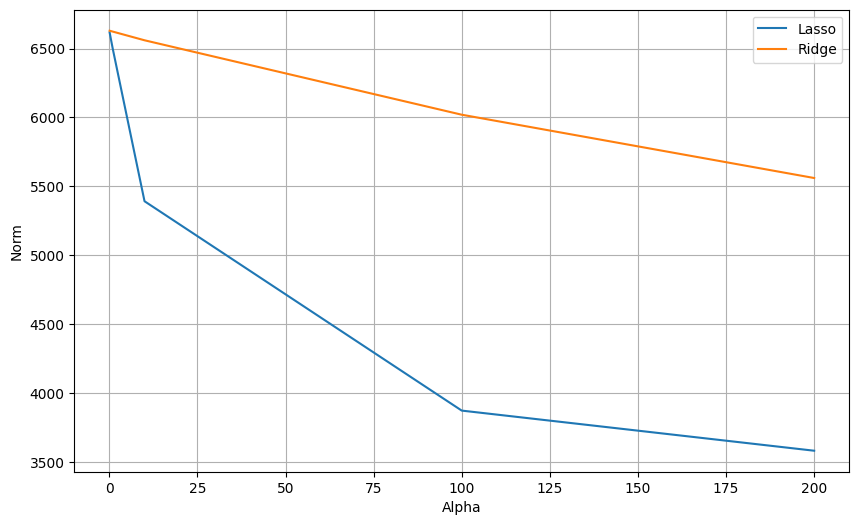

In [ ]:
plt.figure(figsize = (10, 6))

plt.plot(params, vect_lasso, label = 'Lasso')
plt.plot(params, vect_ridge, label = 'Ridge')
plt.xlabel("Alpha")
plt.ylabel("Norm")
plt.legend()
plt.grid()

plt.show()

Lasso уменьшает веса сильнее.  
Lasso часто используют для отбора признаков, поскольку зануляет большие веса. Чем больше коэффициент *alpha*, тем больше отсеется признаков. Это связано с тем, что "открытым кругом" в смысле L1 нормы является квадрат, повернутый на 45 градусов, а "открытым кругом" в смысле L2 нормы является диск. Таким образом, линии уровни пересекутся с границей квадрата (зануление какого-то коэффициента) с гораздо большей вероятностью, чем с границей диска.

Подберем оптимальное значение $\alpha$ с помощью кросс-валидации по тренировочной выборке.  
Для проведения кросс-валидации воспользуемся модулем `LassoCV`.  
Выберем $\alpha$, при котором модель дает наилучшее качество.

In [ ]:
from sklearn.linear_model import LassoCV

# Изменим число итераций, поскольку получаем предупреждение о несходимости
lasso_cv = LassoCV(alphas = params, cv = 5, max_iter = 100000, random_state = 0)
lasso_cv.fit(X_train, y_train)
# Выведем порядок альфа и матрицу ошибок
print(f'Order of alpha: {lasso_cv.alphas_}')
mse_matrix = pd.DataFrame(lasso_cv.mse_path_, index = lasso_cv.alphas_, columns = [f'CV{i}' for i in range(5)])
mse_matrix

Order of alpha: [2.e+02 1.e+02 1.e+01 1.e+00 1.e-01]


,CV0,CV1,CV2,CV3,CV4
200.0,2.289042e+06,2.083690e+06,2.255249e+06,2.051188e+06,2.157988e+06
100.0,1.901481e+06,1.721242e+06,1.858020e+06,1.678567e+06,1.801532e+06
10.0,1.441419e+06,1.299342e+06,1.383143e+06,1.261209e+06,1.345867e+06
1.0,1.378931e+06,1.242353e+06,1.334006e+06,1.212486e+06,1.273524e+06
0.1,1.377858e+06,1.241614e+06,1.334506e+06,1.241269e+06,1.272007e+06


In [ ]:
print(f'Наибольшее качество при alpha = {lasso_cv.alphas_[np.argmin(np.mean(mse_matrix, axis = 1))]}')

Наибольшее качество при alpha = 1.0


Обучим итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке.  
Выведем полученные коэффициенты.

In [ ]:
alpha = 1
lasso = Lasso(alpha = 1, max_iter = 100000, random_state = 0)
lasso.fit(X_train, y_train)
lasso.coef_

array([ 5228.56086133,   -94.81899154,   -66.71608979, -1007.19846437,
          -0.        ,   -40.84217731,   143.62017829,   369.55250696,
         295.99492832,   274.12993973,   -62.50195326,   -84.22618828,
        -174.9291816 ,  -332.2982653 ,  -423.54470024,  -511.86764625,
         926.94240145,  1501.97936613,   954.50436151,  1580.37352146,
        1721.28955256,  1221.13867319,  1396.64080979])

In [ ]:
data.drop(['price'], axis = 1).head().iloc[:, [10, 11]] # Отвечают весам -62. и -84 соответственно

,color_E,color_F
0,1,0
1,1,0
2,1,0
3,0,0
4,0,0


Первый признак - свободный член.  
Самые весомые - последние 4 признака: они отвечают за чистоту брилланта, при этом признаки [-3], [-4] имеют вес больше, чем признаки [-2],[-1], что логично, потому что бриллианты VS1, VS2 стоят дороже, чем бриллианты VVS1, VVS2.  
Самые неинформативные признаки - это размер алмаза и его цвет.


Сделаем предсказания обученной Lasso-регрессии на тестовой выборке и сравним среднеквадратичную ошибку с ошибкой обычной линейной регресии.

In [ ]:
y_pred = lasso.predict(X_test)
print('Linear Regression MSE on test is: 1259159.1137946642') # Скопировал результат, полученый ранее
print(f'Lasso MSE on test is: {mse(y_test, y_pred)}')

Linear Regression MSE on test is: 1259159.1137946642
Lasso MSE on test is: 1261270.768756434


Ошибка у обычной линейной регрессии меньше, отсюда следует, что ее, возможно, лучше использовать для предсказаний. Это может быть связано с тем, что Лассо занулило слишком много коэффициентов.